In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix

In [3]:
Xtrain = np.loadtxt('Q2_train_Data', delimiter = ',') # shape (2, 1000)
Xtest = np.loadtxt('Q2_test_Data', delimiter = ',') # shape (2, 10000)

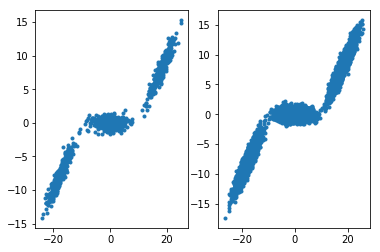

In [4]:
# Verify data matches that in matlab
#Xtrain[0,:] x values, Xtrain[1,:] y values
plt.subplot(121)
plt.plot(Xtrain[0,:],Xtrain[1,:],'.')
plt.subplot(122)
plt.plot(Xtest[0,:], Xtest[1,:],'.')

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [ ]:
#training
accuracy = np.zeros((10,10))
accuracy2 = np.zeros((2,10,10))
x_data = Xtrain[0,:]
y_data = Xtrain[1,:]
kf = KFold(n_splits=10)
nonlin = ['sigmoid', 'softplus']
l = 0
for activationChoice in nonlin:
    j = 0
    for train_index, test_index in kf.split(x_data):
        print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        for i in range(1,11):
            model = Sequential()
            # Dense(n) is a fully-connected layer with n hidden units.
            # in the first layer, you must specify the expected input data shape:
            # here, 1-dimensional vectors.
            model.add(Dense(i, activation=activationChoice, input_dim=1))
            model.add(Dense(1, activation=None))
            sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
            model.compile(loss='mean_squared_error',
                        optimizer='adam'),
                        #metrics =['mean_squared_error'])#metrics=['accuracy'])
            converged = 0
            tmp = 0
            epsilon = .01
            while not converged:
                model.fit(x_train, y_train, batch_size=128, epochs=50)
                score = model.evaluate(x_test, y_test)
                converged = np.abs(score-tmp)<epsilon
                tmp = score
            print(score)
            accuracy[j,i-1] = score
        j+=1
    accuracy2[l,:,:] = accuracy
    l+=1

In [76]:
accuracy2

array([[[4.08151599, 0.66957269, 0.69109931, 0.71834491, 0.62431301,
         0.67764143, 0.63079732, 2.92136445, 0.8625786 , 0.89196188],
        [3.32557633, 0.75577456, 1.63002162, 0.79213514, 0.7300631 ,
         0.73024408, 0.64420995, 2.49356557, 2.49524482, 0.72434085],
        [3.50033623, 0.89384289, 0.89998671, 0.69408321, 0.63929091,
         0.81611719, 0.65561534, 0.78300329, 2.07380096, 0.67548946],
        [3.80708927, 0.74721734, 0.73686176, 0.6927432 , 0.73745317,
         0.73539035, 0.69820258, 0.80681216, 0.75416725, 2.55403718],
        [3.75718056, 0.82902059, 0.86209238, 0.711318  , 0.76492676,
         0.71614063, 0.76606102, 1.02706706, 0.71892631, 0.86215232],
        [3.2251746 , 0.58109965, 0.68395115, 1.00891881, 0.56767562,
         0.50648118, 0.73826876, 1.02102642, 0.69707997, 0.5397388 ],
        [3.32883652, 0.78658073, 0.6866749 , 0.6518848 , 0.86021337,
         0.60281974, 0.65415586, 0.7456144 , 0.62659634, 0.72676374],
        [3.96311266, 0.8999

In [77]:
model_meansSig = np.mean(accuracy2[0,:,:],axis=1)
model_orderSig = (np.argmin(model_meansSig)+1)
model_orderSig

10

In [78]:
model_meansSoft = np.mean(accuracy2[1,:,:],axis=1)
model_orderSoft = (np.argmin(model_meansSoft)+1)
model_orderSoft

10

In [94]:
model_meansSig

array([1.27691896, 1.4321176 , 1.16315662, 1.22699743, 1.10148856,
       0.9569415 , 0.96701404, 1.27658708, 1.02958111, 0.92701299])

<function matplotlib.pyplot.show>

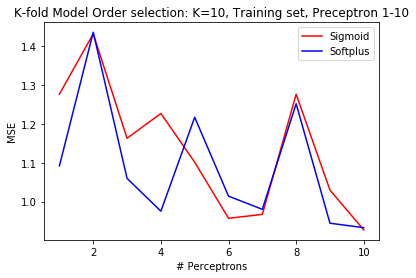

In [79]:
plt.plot(np.arange(1,11), model_meansSig,'r')
plt.plot(np.arange(1,11), model_meansSoft,'b')
plt.title('K-fold Model Order selection: K=10, Training set, Preceptron 1-10')
plt.xlabel('# Perceptrons')
plt.ylabel('MSE')
plt.legend(['Sigmoid', 'Softplus'])
plt.show

In [92]:
if model_meansSoft[model_orderSoft-1]<model_meansSig[model_orderSig-1]:
    ActivationChoice = 1
    model_order = model_orderSoft
else:
    ActivationChoice = 0
    model_order = model_orderSig
ActivationChoice
nonlin[ActivationChoice]

'sigmoid'

In [ ]:
model = Sequential()
# Dense(n) is a fully-connected layer with n hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 1-dimensional vectors.
model.add(Dense(model_order, activation=nonlin[ActivationChoice], input_dim=1))
model.add(Dense(1, activation=None))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
               optimizer='adam'),
               #metrics =['mean_squared_error'])#metrics=['accuracy'])
converged = 0
tmp = 0
epsilon = 0.01
while not converged:
    model.fit(Xtrain[0,:], Xtrain[1,:], batch_size=128, epochs=50)
    score = model.evaluate(Xtest[0,:], Xtest[1,:])
    print(score)
    print(tmp)
    converged = np.abs(score-tmp)<epsilon
    tmp = score    
print("MSE on Test Data: " + str(score))

In [95]:
score

0.6606809679985046

In [96]:
tmp

0.6606809679985046

In [97]:
Y_pred = model.predict(Xtest[0,:],batch_size=None)

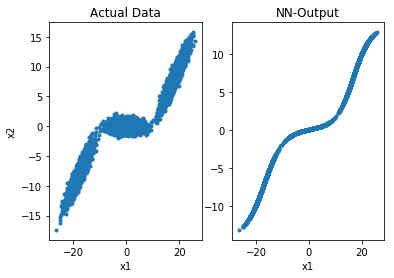

In [98]:
plt.subplot(121)
plt.plot(Xtest[0,:],Xtest[1,:],'.')
plt.title('Actual Data')
plt.xlabel('x1'); plt.ylabel('x2')
plt.subplot(122)
plt.title('NN-Output')
plt.plot(Xtest[0,:], Y_pred, '.')
plt.xlabel('x1');
#plotted with nodes = 10

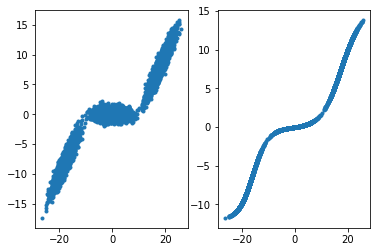

In [87]:
plt.subplot(121)
plt.plot(Xtest[0,:],Xtest[1,:],'.')
plt.subplot(122)
plt.plot(Xtest[0,:], Y_pred, '.')

In [ ]:
model = Sequential()
# Dense(n) is a fully-connected layer with n hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 1-dimensional vectors.
model.add(Dense(4, activation='relu', input_dim=1))
model.add(Dense(1, activation=None))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
               optimizer='adam'),
               #metrics =['mean_squared_error'])#metrics=['accuracy'])
converged = 0
tmp = 0
epsilon = 0.01
while not converged:
    model.fit(Xtrain[0,:], Xtrain[1,:], batch_size=128, epochs=50)
    score = model.evaluate(Xtest[0,:], Xtest[1,:])
    print(score)
    print(tmp)
    converged = np.abs(score-tmp)<epsilon
    tmp = score    
print("MSE on Test Data: " + str(score))

In [124]:
score

0.6075891286373138

In [125]:
Y_pred = model.predict(Xtest[0,:],batch_size=None)

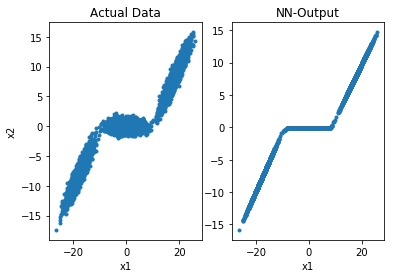

In [126]:
plt.subplot(121)
plt.plot(Xtest[0,:],Xtest[1,:],'.')
plt.title('Actual Data')
plt.xlabel('x1'); plt.ylabel('x2')
plt.subplot(122)
plt.title('NN-Output')
plt.plot(Xtest[0,:], Y_pred, '.')
plt.xlabel('x1');
#plotted with nodes = 10